In [41]:
# 1. Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Загрузка стандартизированного файла
file_path = r'C:\Users\pasha\My_SMARTS_fragmentation\Fragmenting\mol_gnn_project\2_data\raw\BindingDB_cleaned_standardized.csv'
df = pd.read_csv(file_path)

print(f"Data shape: {df.shape}")
df.head()


Data shape: (2084346, 12)


,BindingDB Reactant_set_id,Ligand SMILES,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),EC50 (nM),Kd (nM),pKi,pIC50,pEC50,pKd
0,143,Cc1nc(CN2CCN(CC2)c2c(Cl)cnc3[nH]c(nc23)-c2cn(C...,Cytochrome P450 3A4,Homo sapiens,NaN,50000.0,NaN,NaN,NaN,4.30103,NaN,NaN
1,199,CN(Cc1ccc(s1)C(=O)N[C@@H](CC(O)=O)C(=O)CSCc1cc...,Caspase-3,Homo sapiens,90.0,NaN,NaN,NaN,7.045757,NaN,NaN,NaN
2,200,OC(=O)C[C@H](NC(=O)c1ccc(CNS(=O)(=O)c2ccc(O)c(...,Caspase-1,Homo sapiens,160.0,NaN,NaN,NaN,6.795880,NaN,NaN,NaN
3,201,OC(=O)C[C@H](NC(=O)c1ccc(CNS(=O)(=O)c2ccc(O)c(...,Caspase-1,Homo sapiens,3900.0,NaN,NaN,NaN,5.408935,NaN,NaN,NaN
4,202,CN(Cc1ccc(s1)C(=O)N[C@@H](CC(O)=O)C(=O)CSCc1cc...,Caspase-1,Homo sapiens,12000.0,NaN,NaN,NaN,4.920819,NaN,NaN,NaN


In [42]:
print("Количество строк в базе:")
len(df)

Количество строк в базе:


2084346

### Построение гистограмм распределения pKi, pIC50, pEC50, pKd

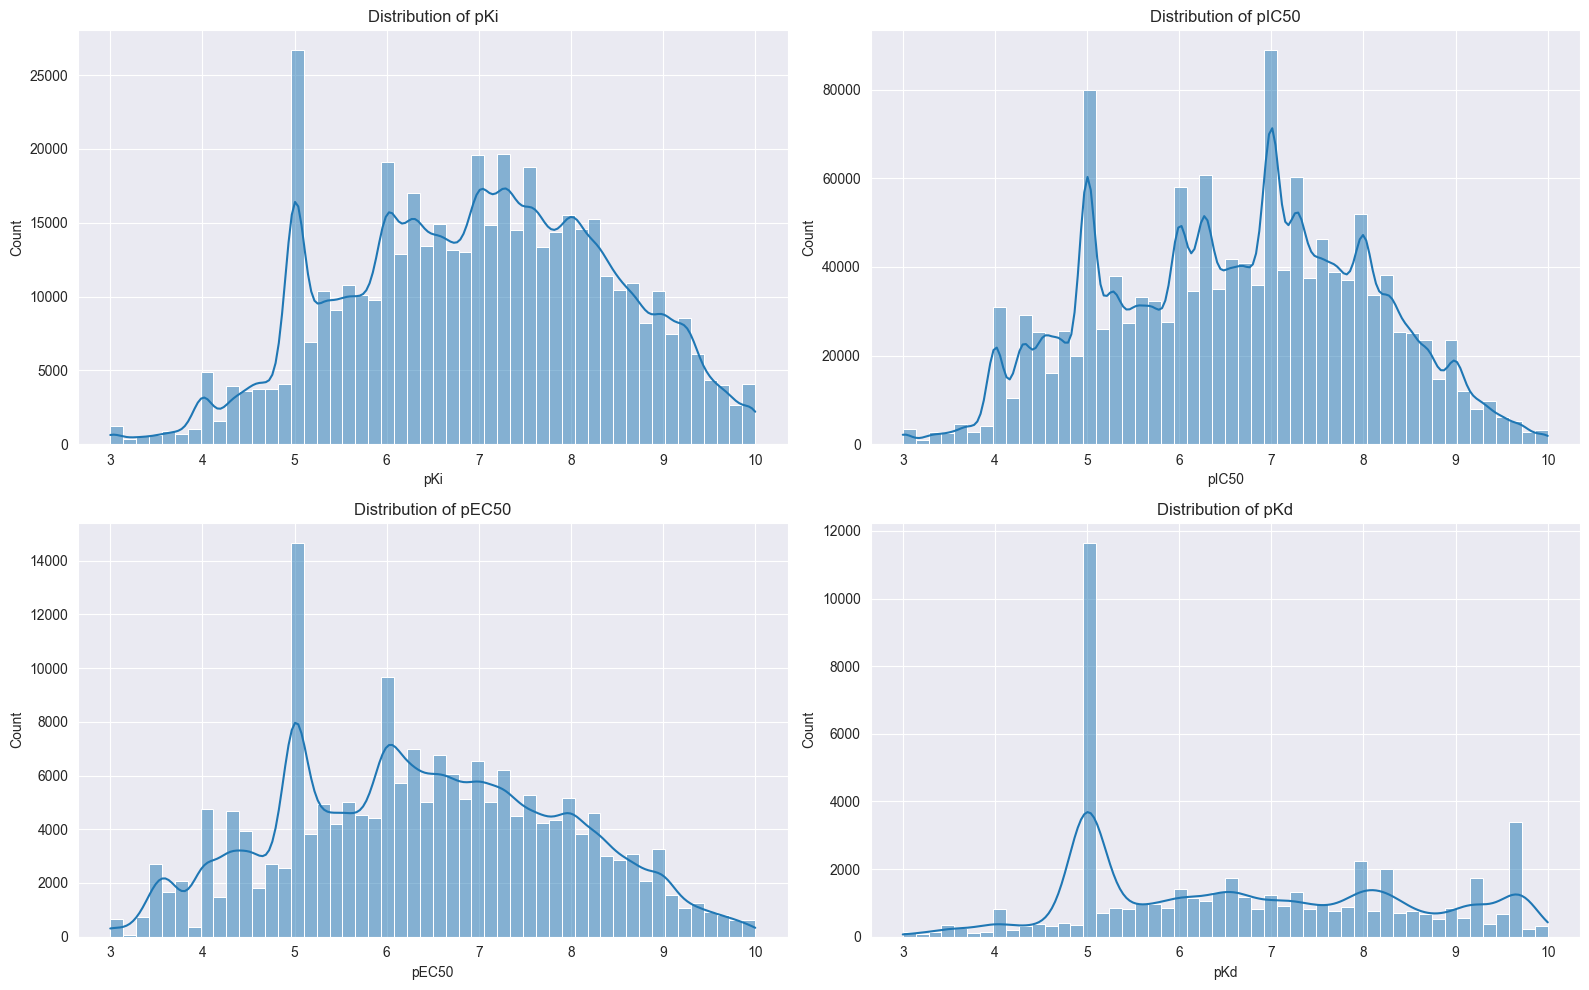

In [43]:
# 3. Гистограммы значений активности
activity_p_cols = ['pKi', 'pIC50', 'pEC50', 'pKd']

plt.figure(figsize=(16, 10))
for idx, col in enumerate(activity_p_cols, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### График: сколько записей на каждый Target Name


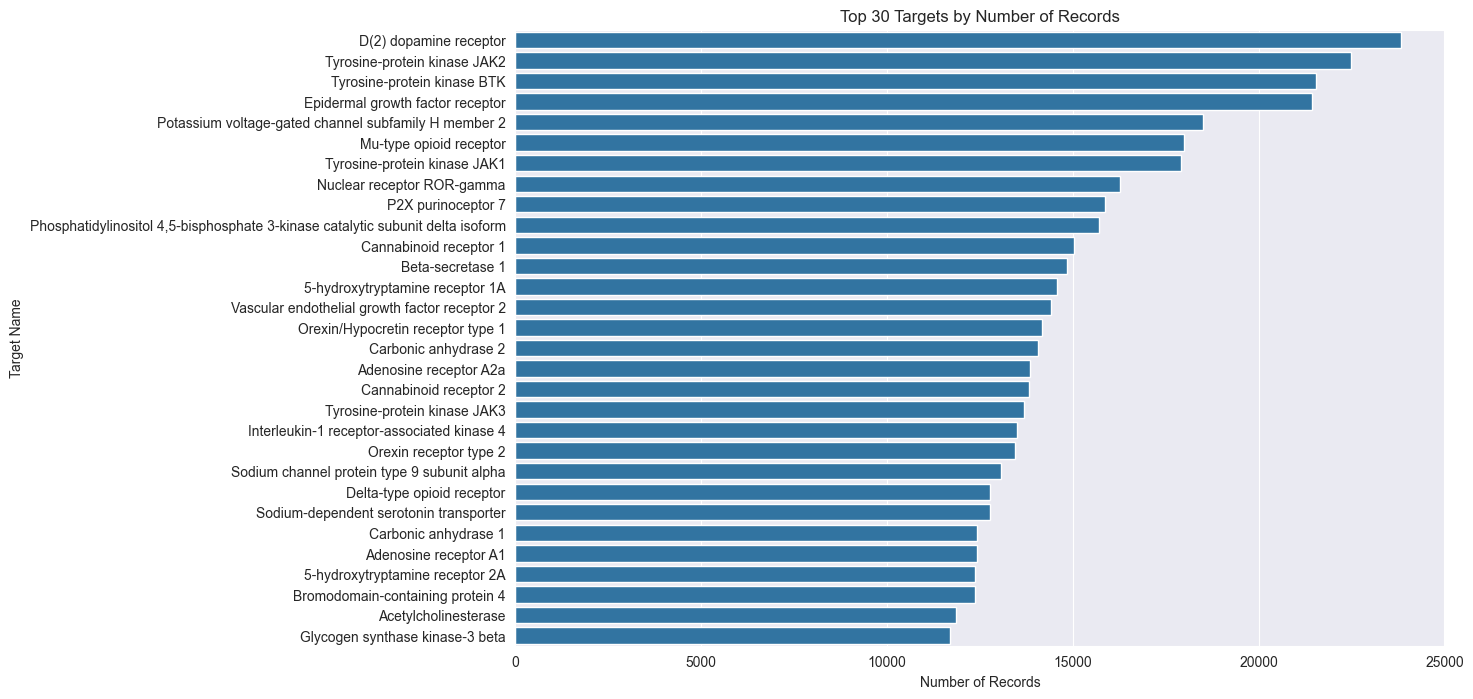

In [44]:
# 4. Считаем количество записей по каждому таргету
target_counts = df['Target Name'].value_counts()

# Берем только топ-30 самых популярных целей для наглядности
top_targets = target_counts.head(30)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_targets.values, y=top_targets.index)
plt.xlabel('Number of Records')
plt.title('Top 30 Targets by Number of Records')
plt.show()


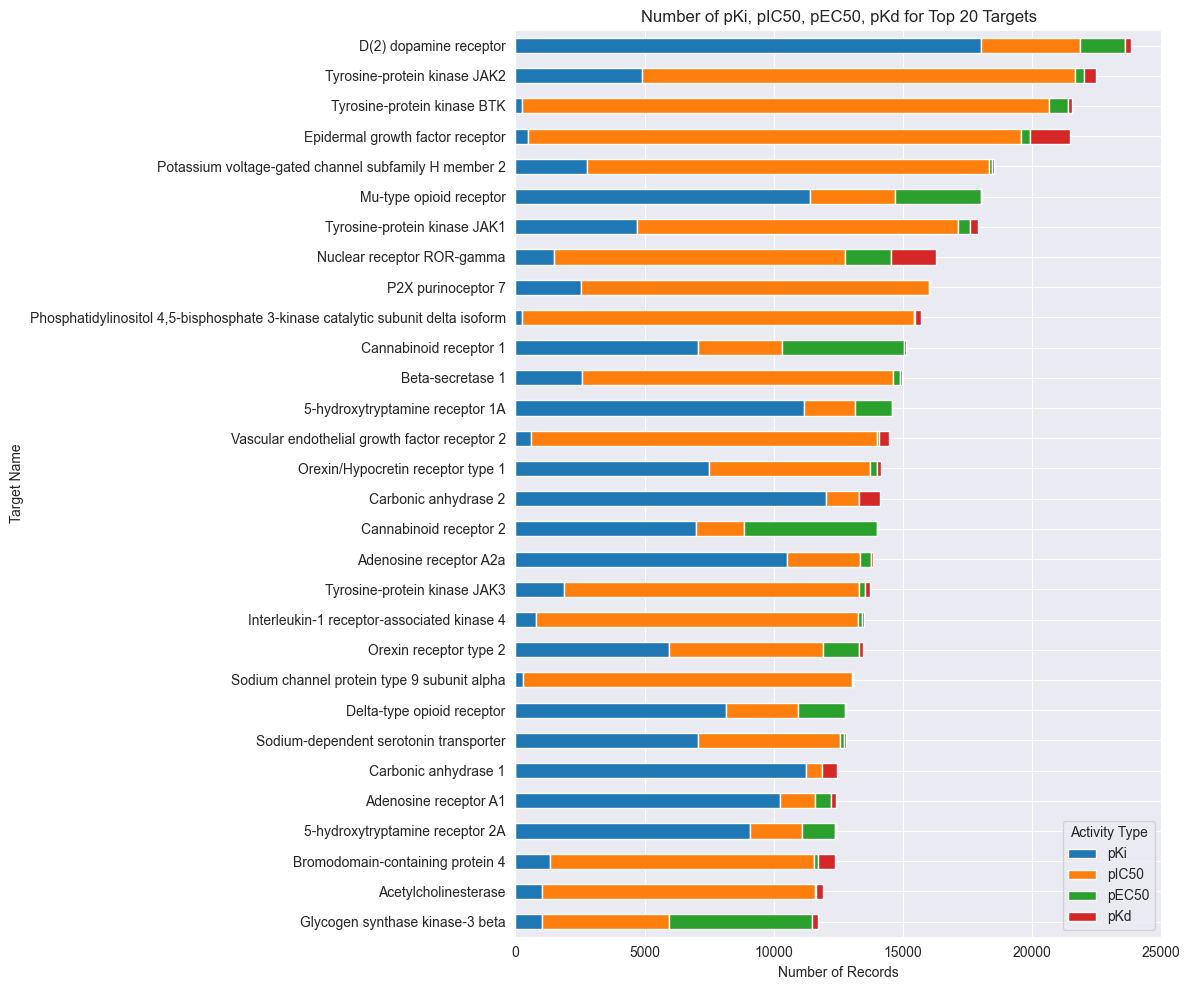

In [51]:
# Готовим данные
activity_types = ['pKi', 'pIC50', 'pEC50', 'pKd']
# activity_types = ['pIC50']

# Для каждого типа активности считаем количество значений на каждый таргет
activity_counts = {}
for activity in activity_types:
    activity_counts[activity] = df[~df[activity].isna()]['Target Name'].value_counts()

# Собираем всё в один DataFrame
activity_counts_df = pd.DataFrame(activity_counts).fillna(0)

# Оставляем топ-20 самых популярных таргетов по суммарному количеству записей
top_targets = activity_counts_df.sum(axis=1).sort_values(ascending=False).head(30).index
activity_counts_df = activity_counts_df.loc[top_targets]

# Рисуем stacked bar plot
activity_counts_df.plot(kind='barh', stacked=True, figsize=(12, 10))

plt.xlabel('Number of Records')
plt.title('Number of pKi, pIC50, pEC50, pKd for Top 20 Targets')
plt.legend(title='Activity Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


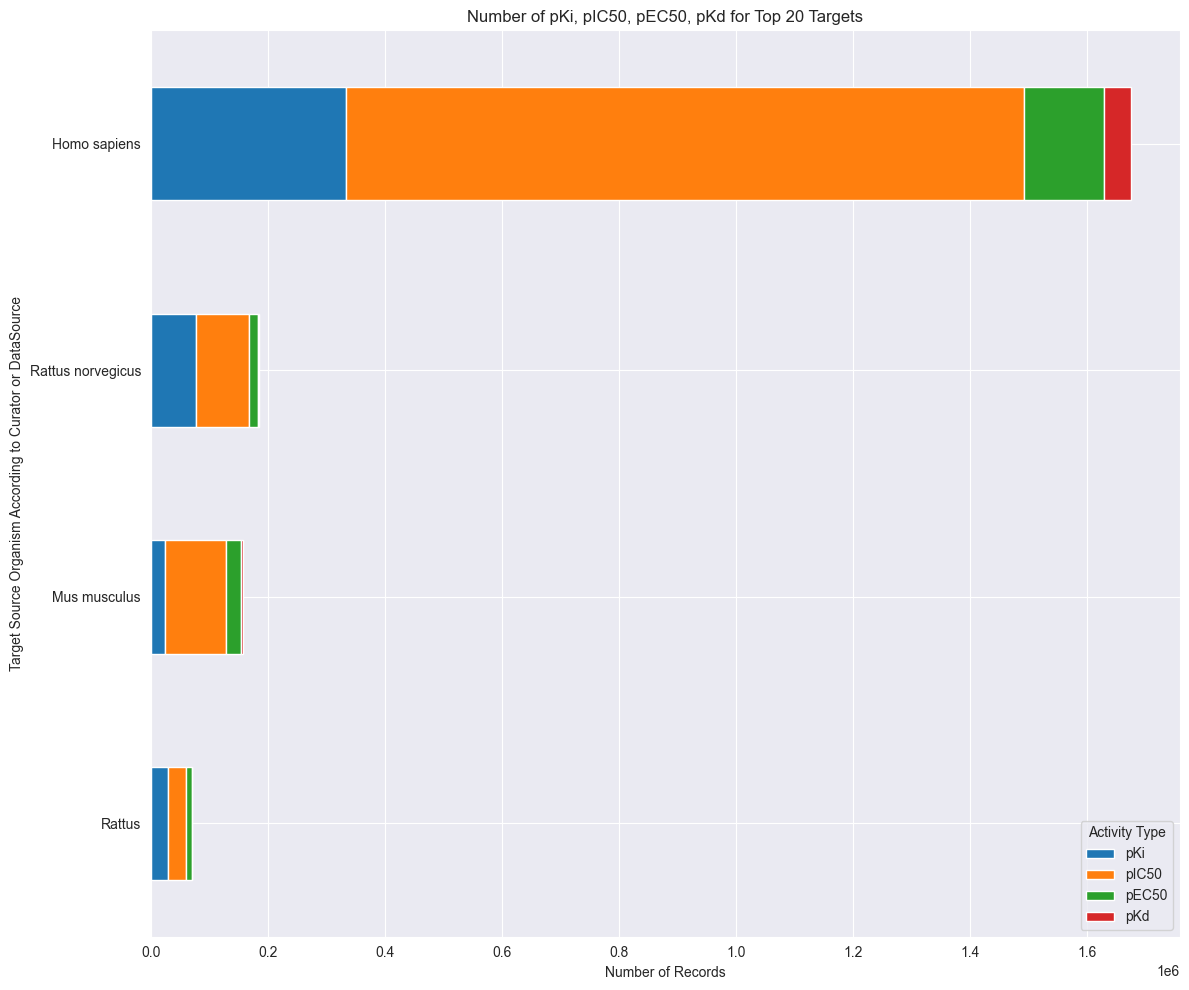

In [46]:
# Готовим данные
activity_types = ['pKi', 'pIC50', 'pEC50', 'pKd']

# Для каждого типа активности считаем количество значений на каждый таргет
activity_counts = {}
for activity in activity_types:
    activity_counts[activity] = df[~df[activity].isna()]['Target Source Organism According to Curator or DataSource'].value_counts()

# Собираем всё в один DataFrame
activity_counts_df = pd.DataFrame(activity_counts).fillna(0)

# Оставляем топ-20 самых популярных таргетов по суммарному количеству записей
top_targets = activity_counts_df.sum(axis=1).sort_values(ascending=False).head(10).index
activity_counts_df = activity_counts_df.loc[top_targets]

# Рисуем stacked bar plot
activity_counts_df.plot(kind='barh', stacked=True, figsize=(12, 10))

plt.xlabel('Number of Records')
plt.title('Number of pKi, pIC50, pEC50, pKd for Top 20 Targets')
plt.legend(title='Activity Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


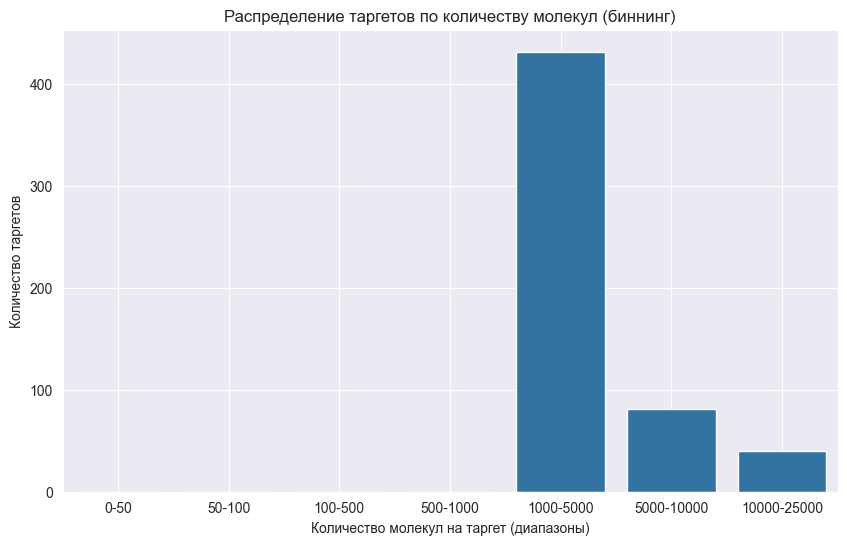

count
0-50             0
50-100           0
100-500          0
500-1000         0
1000-5000      432
5000-10000      81
10000-25000     40
Name: count, dtype: int64


In [47]:
# Подсчёт молекул на таргет
target_counts = df['Target Name'].value_counts()

# Бины для распределения
bins = [0, 50, 100, 500, 1000, 5000, 10000, 25000]
labels = ['0-50', '50-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-25000']
target_bins = pd.cut(target_counts, bins=bins, labels=labels)

# Считаем количество таргетов в каждом диапазоне
bin_counts = target_bins.value_counts().sort_index()

# Строим красивую гистограмму
plt.figure(figsize=(10,6))
sns.barplot(x=bin_counts.index, y=bin_counts.values)
plt.xlabel('Количество молекул на таргет (диапазоны)')
plt.ylabel('Количество таргетов')
plt.title('Распределение таргетов по количеству молекул (биннинг)')
plt.grid(True)
plt.show()

# И печать цифрами
print(bin_counts)

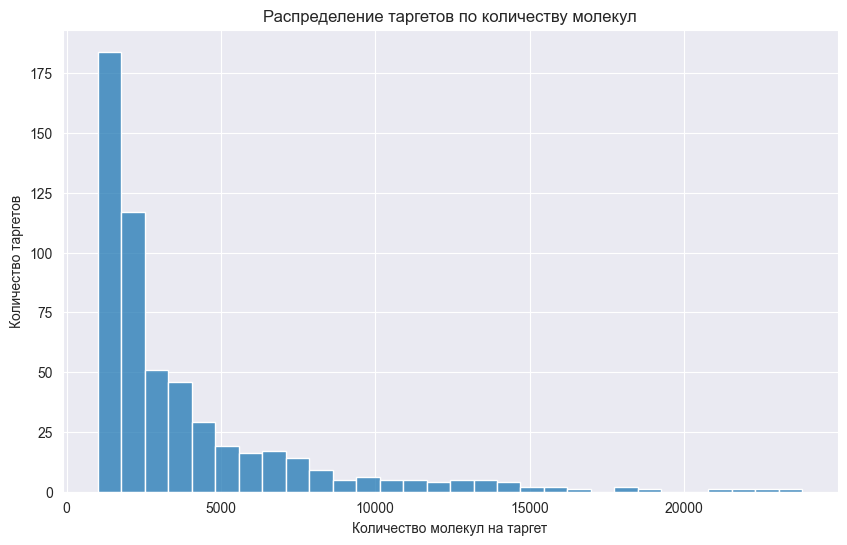

Минимум молекул на таргет: 1008
Максимум молекул на таргет: 23835
Среднее количество молекул на таргет: 3769.16
Количество уникальных таргетов: 553


In [48]:
# 1. Считаем количество молекул на каждый таргет после всех фильтраций
target_counts_post_filter = df['Target Name'].value_counts()

# 2. Строим распределение количества молекул на таргет
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(target_counts_post_filter, bins=30)
plt.xlabel('Количество молекул на таргет')
plt.ylabel('Количество таргетов')
plt.title('Распределение таргетов по количеству молекул')
plt.grid(True)
plt.show()

# 3. Выводим краткую статистику
print(f"Минимум молекул на таргет: {target_counts_post_filter.min()}")
print(f"Максимум молекул на таргет: {target_counts_post_filter.max()}")
print(f"Среднее количество молекул на таргет: {target_counts_post_filter.mean():.2f}")
print(f"Количество уникальных таргетов: {target_counts_post_filter.shape[0]}")


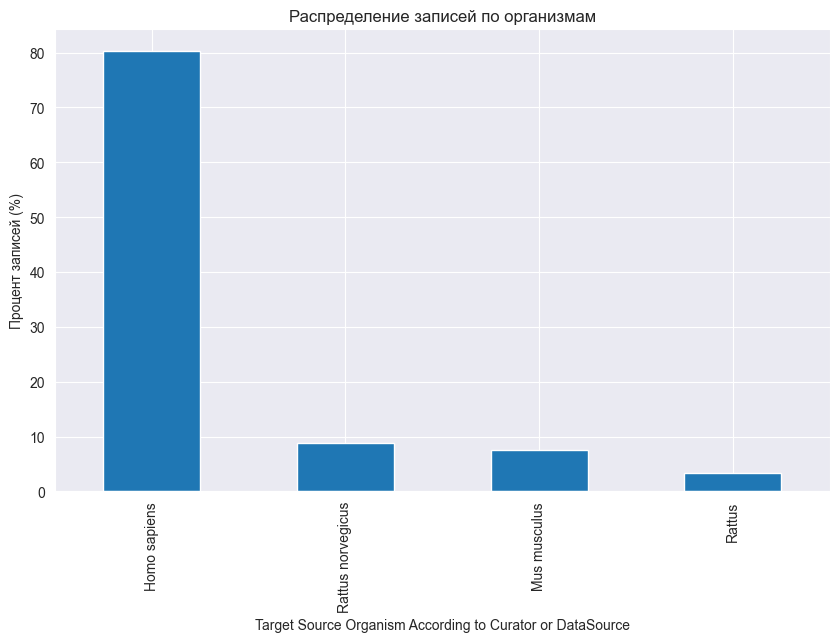

In [49]:
organism_distribution = df['Target Source Organism According to Curator or DataSource'].value_counts(normalize=True) * 100

plt.figure(figsize=(10,6))
organism_distribution.plot(kind='bar')
plt.ylabel('Процент записей (%)')
plt.title('Распределение записей по организмам')
plt.grid(True)
plt.show()
